In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("creditcard.csv")

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()                       #To check if there is any missing values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [7]:
df.columns                  #To check the columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df['Class'].value_counts()      #To check the number of fraud cases and clearly it's a small number

0    284315
1       492
Name: Class, dtype: int64

Exploratory Data Analysis (EDA)

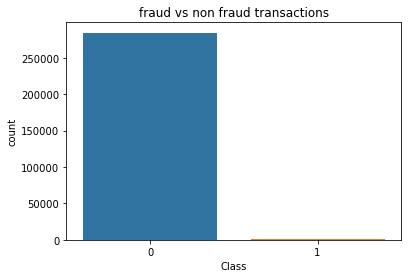

In [10]:
sns.countplot(x=df['Class'])
plt.title('fraud vs non fraud transactions')
plt.show()

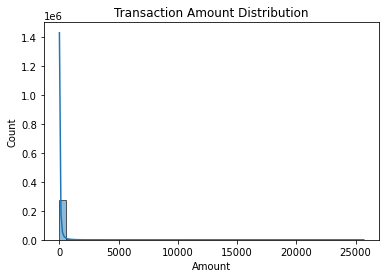

In [14]:
sns.histplot(df['Amount'],bins=50,kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

In [15]:
df['Hour']=df['Time']//3600%24 #To convert time into Hours

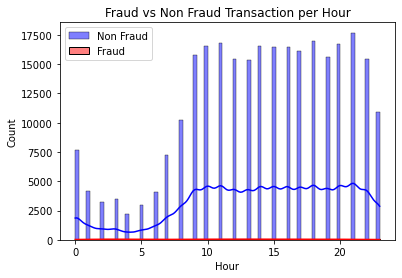

In [20]:
sns.histplot(df[df['Class']==0]['Hour'],color='blue',label='Non Fraud',kde=True)
sns.histplot(df[df['Class']==1]['Hour'],color='red',label='Fraud',kde=True)
plt.legend()
plt.title("Fraud vs Non Fraud Transaction per Hour")
plt.show()                                          #This is to check fraudulent transactions per time patterns

Text(0.5, 1.0, 'feature correlation Heatmap')

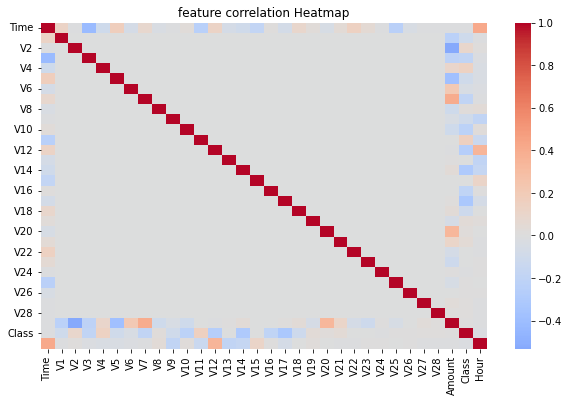

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',center=0)
plt.title('feature correlation Heatmap')                      #Heatmap showcase the hihly correlated variables

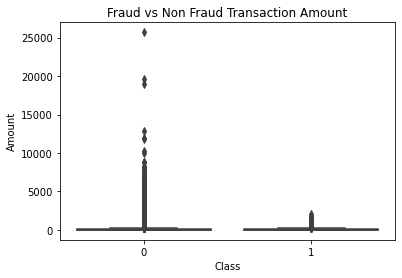

In [31]:
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Fraud vs Non Fraud Transaction Amount')
plt.show()                                                  #Detecting outliers, Fraudulent cases usually shocase different amount distribution but not in this case

MODEL PREPARATION

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
df_fraud=df[df['Class']==1]
df_non_fraud=df[df['Class']==0].sample(len(df_fraud), random_state=42)

In [34]:
df_balanced=pd.concat([df_fraud,df_non_fraud])
x_balanced=df_balanced.drop(columns=['Class'])
y_balanced=df_balanced['Class']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=42)
print(y_train.value_counts())

0    394
1    393
Name: Class, dtype: int64


In [36]:
x=df.drop(columns=['Class'])
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [37]:
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [38]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
print(confusion_matrix(y_test,y_pred))

[[56859     5]
 [   17    81]]



56859 is the True -ve( non-fraud tansaction predict as so)    
81 is the True +ve (fraud transaction predicted as so)     
17 is the False +ve (fraud transaction predicted as non-fraud)     
5 is the False -ve( non-fraud transaction predicted fraud )


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
#accuracy of the model is 1.00*100=100
#precision is 0.83
#recall is 0.94
#f1-score is 0.88
